In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [53]:
df = pd.read_csv("CC GENERAL.csv")

### Revisando los datos

In [54]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [55]:
df.shape

(8950, 18)

In [31]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

### Ver datos nulos

In [56]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [57]:
df.isna().sum().sum()

314

### Porcentaje de nulos por columna

In [35]:
(df.isna().mean() * 100).sort_values(ascending=False)

MINIMUM_PAYMENTS                    3.497207
CREDIT_LIMIT                        0.011173
CUST_ID                             0.000000
BALANCE                             0.000000
PRC_FULL_PAYMENT                    0.000000
PAYMENTS                            0.000000
PURCHASES_TRX                       0.000000
CASH_ADVANCE_TRX                    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_FREQUENCY                 0.000000
CASH_ADVANCE                        0.000000
INSTALLMENTS_PURCHASES              0.000000
ONEOFF_PURCHASES                    0.000000
PURCHASES                           0.000000
BALANCE_FREQUENCY                   0.000000
TENURE                              0.000000
dtype: float64

### En este caso se optó por la eliminación de los nulos, pero se podrían utilizar otras técnicas, por ejemplo la completación de los datos con el promedio de la columna

In [58]:
df = df.dropna()

In [59]:
# df_fill_mean = df.fillna(df.mean(numeric_only=True))
# df_fill_median = df.fillna(df.median(numeric_only=True))

### Nos quedamos con las columnas numéricas para usar PCA

In [60]:
df_numeric = df.select_dtypes(include=[np.number])

### Escalamos los datos

In [61]:
scaler = StandardScaler()
df_numeric = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

In [62]:
df_numeric

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.744625,-0.370047,-0.429184,-0.359160,-0.354826,-0.468655,-0.820769,-0.686280,-0.717179,-0.681953,-0.479437,-0.517623,-0.962575,-0.543942,-0.305508,-0.537727,0.355181
1,0.764152,0.067679,-0.473208,-0.359160,-0.458839,2.568556,-1.236139,-0.686280,-0.926522,0.557022,0.099258,-0.597054,0.677204,0.796852,0.087689,0.212380,0.355181
2,0.426602,0.505405,-0.116413,0.099909,-0.458839,-0.468655,1.256077,2.646651,-0.926522,-0.681953,-0.479437,-0.120467,0.813852,-0.399503,-0.099906,-0.537727,0.355181
3,-0.373910,0.505405,-0.465825,-0.349660,-0.458839,-0.468655,-1.028455,-0.408536,-0.926522,-0.681953,-0.479437,-0.557339,-0.907916,-0.380165,-0.261131,-0.537727,0.355181
4,0.099551,0.505405,0.142062,-0.359160,0.994815,-0.468655,0.425339,-0.686280,0.538882,-0.681953,-0.479437,-0.279329,-0.743938,-0.132119,0.650363,-0.537727,0.355181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8631,-0.761342,-1.902089,-0.463563,-0.346751,-0.458839,-0.468655,-0.820769,-0.130790,-0.926522,-0.681953,-0.479437,-0.557339,-1.099224,-0.593143,-0.345988,-0.537727,-4.221800
8632,-0.750546,0.505405,-0.338865,-0.359160,-0.141436,-0.468655,1.256077,-0.686280,1.166912,-0.681953,-0.479437,-0.358760,-0.962575,-0.501396,-0.343706,1.150015,-4.221800
8633,-0.752977,-0.297095,-0.406572,-0.359160,-0.301402,-0.468655,0.840707,-0.686280,0.748227,-0.681953,-0.479437,-0.398476,-0.962575,-0.585367,-0.329572,0.306144,-4.221800
8634,-0.757721,-0.297095,-0.473208,-0.359160,-0.458839,-0.451422,-1.236139,-0.686280,-0.926522,0.144032,-0.190089,-0.597054,-1.099224,-0.595238,-0.340811,0.306144,-4.221800


### Aplicamos reducción de dimensionalidad

In [40]:
pca = PCA(n_components=2).fit_transform(df_numeric)
df_pca = pd.DataFrame(pca, columns=["PC1", "PC2"])

In [41]:
tsne = TSNE(n_components=2).fit_transform(df_numeric)
df_tsne = pd.DataFrame(tsne, columns=["tSNE1", "tSNE2"])

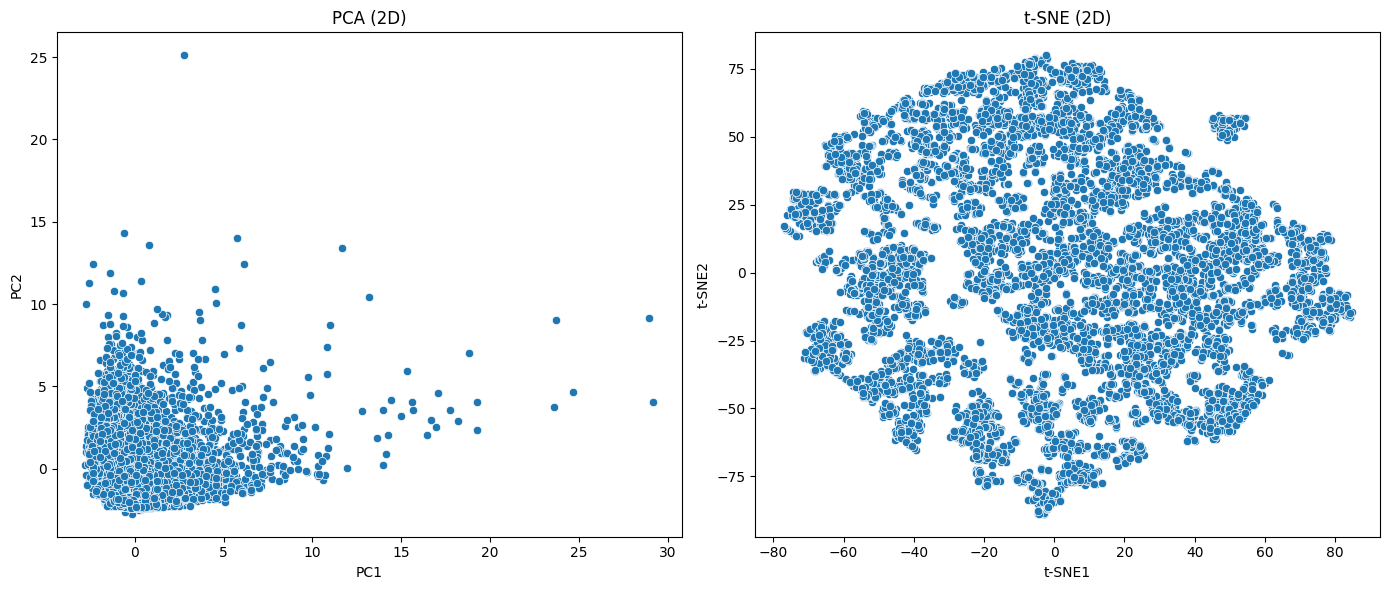

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))

sns.scatterplot(data = df_pca, x = "PC1", y = "PC2", ax=axes[0])
axes[0].set_title("PCA (2D)")
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")

sns.scatterplot(data = df_tsne, x = "tSNE1", y = "tSNE2",ax=axes[1])
axes[1].set_title("t-SNE (2D)")
axes[1].set_xlabel("t-SNE1")
axes[1].set_ylabel("t-SNE2")

plt.tight_layout()
plt.show()

### Método del Codo

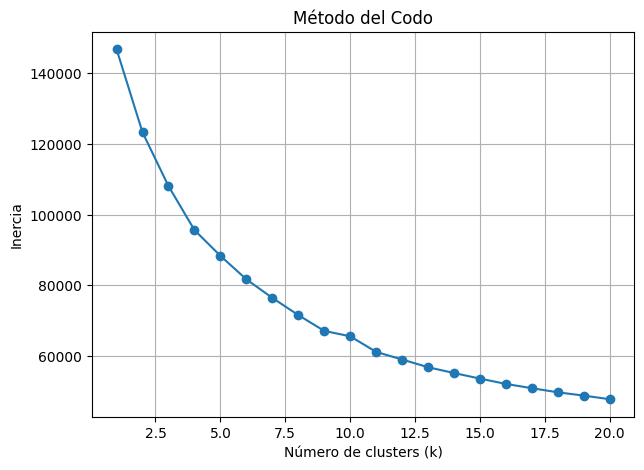

In [64]:
inertias = []
ks = range(1, 21)

for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(df_numeric)
    inertias.append(km.inertia_)

plt.figure(figsize=(7,5))
plt.plot(ks, inertias, marker='o')
plt.title("Método del Codo")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia")
plt.grid(True)
plt.show()

### Nos quedamos con clusters = 3

In [44]:
kmeans = KMeans(n_clusters = 3)
labels = kmeans.fit_predict(df_numeric)

In [45]:
df_pca["Cluster"] = labels
df_tsne["Cluster"] = labels

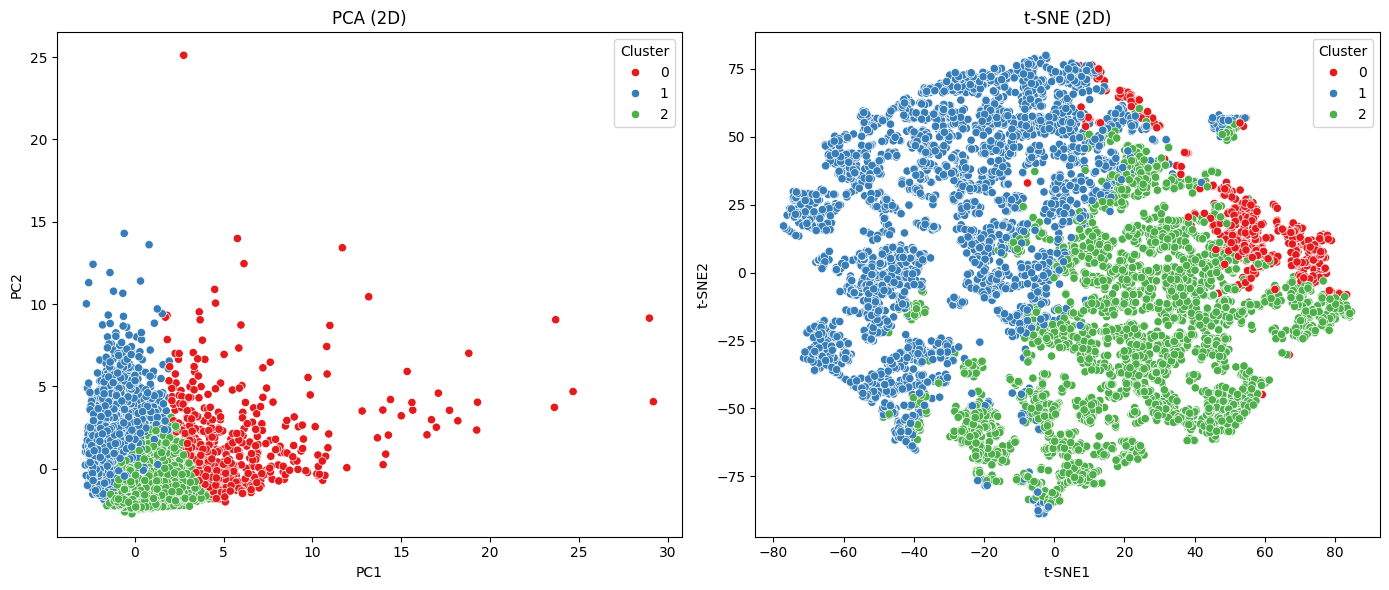

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))

sns.scatterplot(data = df_pca, x = "PC1", y = "PC2", hue = "Cluster", ax=axes[0], palette = "Set1")
axes[0].set_title("PCA (2D)")
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")

sns.scatterplot(data = df_tsne, x = "tSNE1", y = "tSNE2", hue = "Cluster", ax=axes[1], palette = "Set1")
axes[1].set_title("t-SNE (2D)")
axes[1].set_xlabel("t-SNE1")
axes[1].set_ylabel("t-SNE2")

plt.tight_layout()
plt.show()

In [47]:
df["Cluster"] = labels

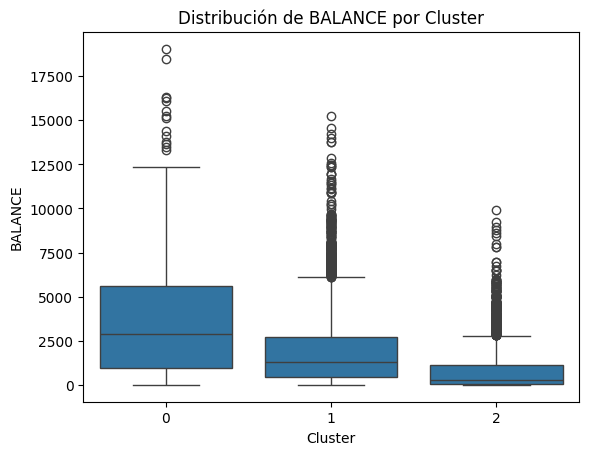

In [48]:
sns.boxplot(data=df, x='Cluster', y='BALANCE')
plt.title("Distribución de BALANCE por Cluster")
plt.show()

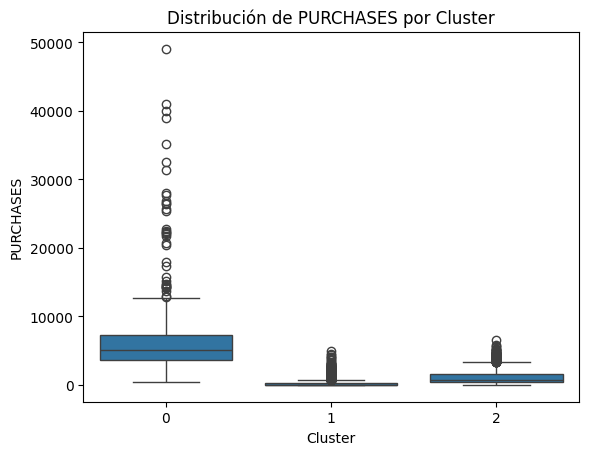

In [49]:
sns.boxplot(data=df, x='Cluster', y='PURCHASES')
plt.title("Distribución de PURCHASES por Cluster")
plt.show()

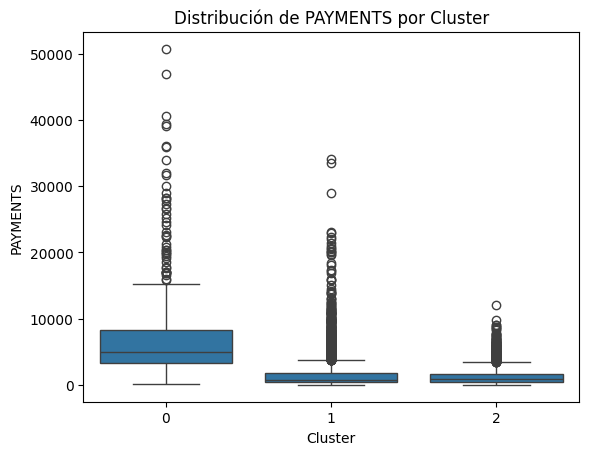

In [50]:
sns.boxplot(data=df, x='Cluster', y='PAYMENTS')
plt.title("Distribución de PAYMENTS por Cluster")
plt.show()

### Eliminamos BALANCE y vemos que sucede

In [65]:
df_sin_balance = df_numeric.drop(columns=['BALANCE'])

In [66]:
pca_sin_balance = PCA(n_components=2).fit_transform(df_sin_balance)
df_pca_sin_balance = pd.DataFrame(pca_sin_balance, columns=['PC1','PC2'])
df_pca_sin_balance['Cluster'] = labels

In [67]:
tsne_sin_balance = TSNE(n_components=2).fit_transform(df_sin_balance)
df_tsne_sin_balance = pd.DataFrame(tsne_sin_balance, columns=['tSNE1','tSNE2'])
df_tsne_sin_balance['Cluster'] = labels

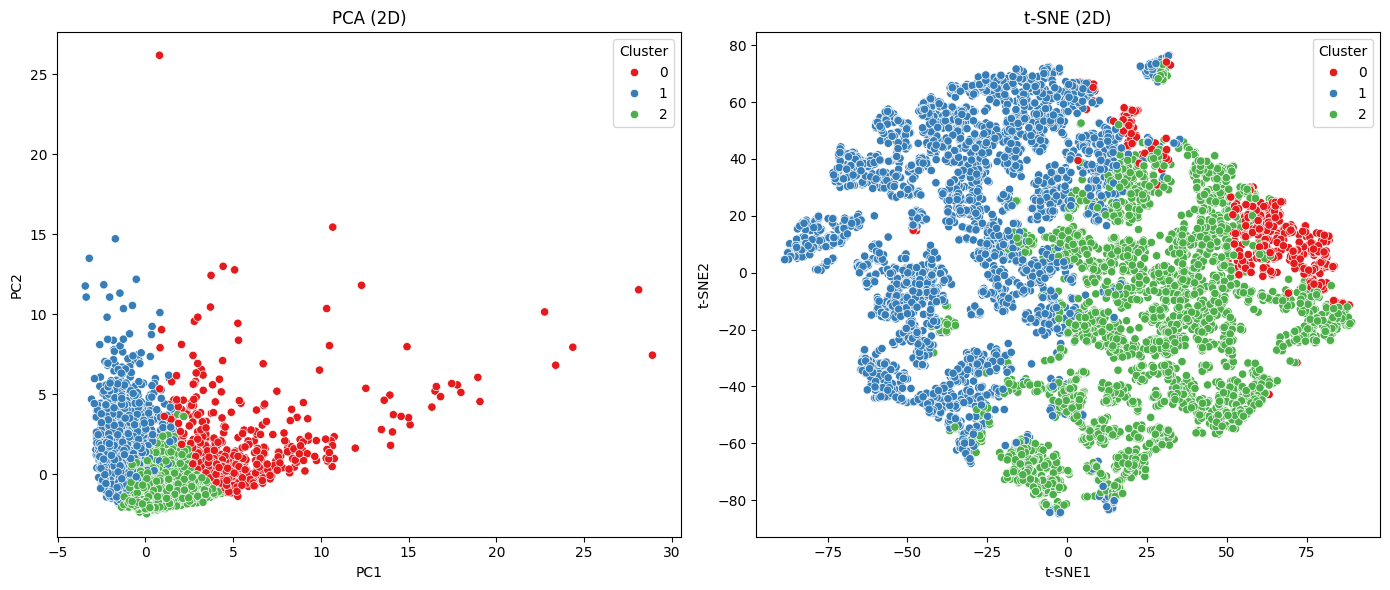

In [68]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))

sns.scatterplot(data = df_pca_sin_balance, x = "PC1", y = "PC2", hue = "Cluster", ax=axes[0], palette = "Set1")
axes[0].set_title("PCA (2D)")
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")

sns.scatterplot(data = df_tsne_sin_balance, x = "tSNE1", y = "tSNE2", hue = "Cluster", ax=axes[1], palette = "Set1")
axes[1].set_title("t-SNE (2D)")
axes[1].set_xlabel("t-SNE1")
axes[1].set_ylabel("t-SNE2")

plt.tight_layout()
plt.show()

### Eliminamos PURCHASES y PAYMENTS a ver que sucede

In [77]:
df_sin_purchases = df_numeric.drop(columns=["PURCHASES", "PAYMENTS", "BALANCE"])

In [78]:
pca_sin_purchases = PCA(n_components=2).fit_transform(df_sin_purchases)
df_pca_sin_purchases = pd.DataFrame(pca_sin_purchases, columns=['PC1','PC2'])
df_pca_sin_purchases['Cluster'] = labels

In [75]:
tsne_sin_purchases = TSNE(n_components=2).fit_transform(df_sin_purchases)
df_tsne_sin_purchases = pd.DataFrame(tsne_sin_purchases, columns=['tSNE1','tSNE2'])
df_tsne_sin_purchases['Cluster'] = labels

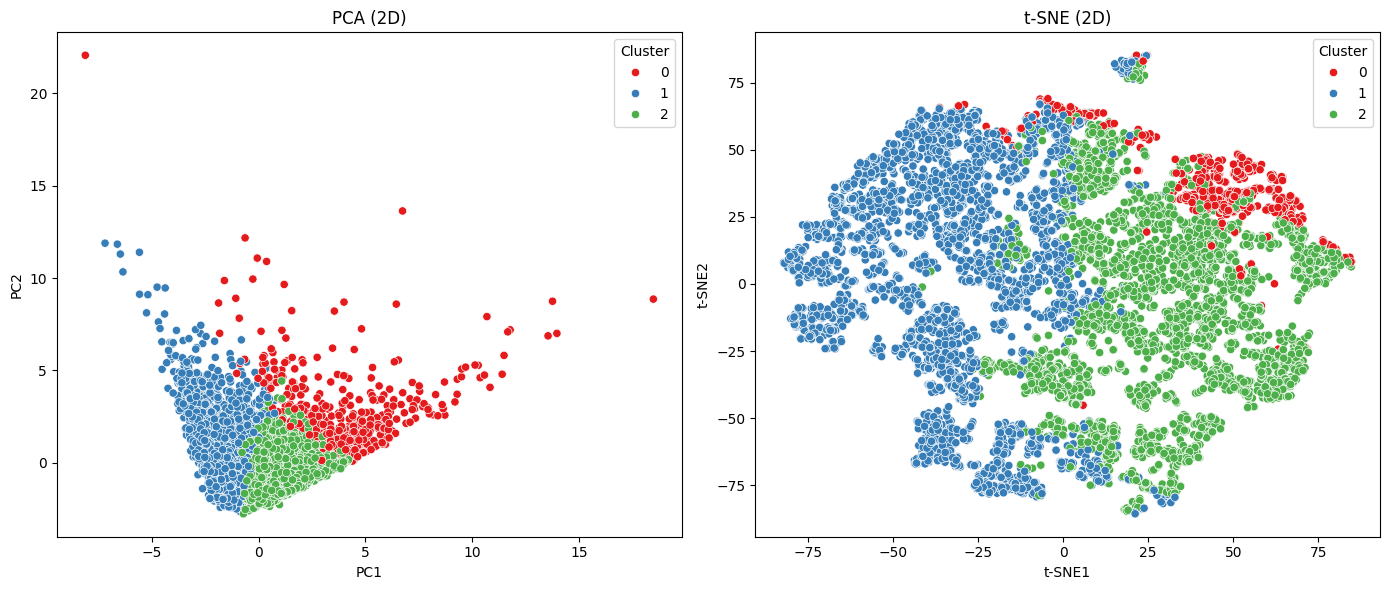

In [79]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))

sns.scatterplot(data = df_pca_sin_purchases, x = "PC1", y = "PC2", hue = "Cluster", ax=axes[0], palette = "Set1")
axes[0].set_title("PCA (2D)")
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")

sns.scatterplot(data = df_tsne_sin_purchases, x = "tSNE1", y = "tSNE2", hue = "Cluster", ax=axes[1], palette = "Set1")
axes[1].set_title("t-SNE (2D)")
axes[1].set_xlabel("t-SNE1")
axes[1].set_ylabel("t-SNE2")

plt.tight_layout()
plt.show()

### Se puede seguir con más detalle el estudio de que columnas son las que más atribuyen a la segmentación, con el fin categorizar los Clusters